In [1]:
!pip install openpyxl
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Load and merge data with manually labeled articles:

In [2]:
data1 = pd.read_excel('SB_validation_data/Data2Sclassify_Seba.xlsx')
data2 = pd.read_excel('SB_validation_data/Data2Sclassify_Pablo_New.xlsx')
data3 = pd.read_excel('SB_validation_data/Data2Sclassify_Sofi.xlsx')
data4 = pd.read_excel('SB_validation_data/Data2Sclassify_Favio.xlsx')
data5 = pd.read_excel('SB_validation_data/Data2Sclassify_Ale.xlsx')
data6 = pd.read_excel('SB_validation_data/Data2Sclassify_Lucio.xlsx')

In [3]:
all_data = data1.merge(data2[['id', 'Posicion CL','Posicion CR']], on = 'id', suffixes=[None, '_pablo'])
all_data = all_data.merge(data3[['id', 'Posicion CL','Posicion CR']], on = 'id', suffixes=[None, '_sofi'])
all_data = all_data.merge(data4[['id', 'Posicion CL','Posicion CR']], on = 'id', suffixes=[None, '_favio'])
all_data = all_data.merge(data5[['id', 'Posicion CL','Posicion CR']], on = 'id', suffixes=[None, '_ale'])
all_data = all_data.merge(data6[['id', 'Posicion CL','Posicion CR']], on = 'id', suffixes=[None, '_lucio'])

Define an overeal Sentiment manually labeled as the mean of the classification of the labelers:

In [4]:
#all_data['SCL_labeled'] = all_data[[c for c in all_data.columns if 'Posicion CL' in c]].mean(axis = 1)
#all_data['SCR_labeled'] = all_data[[c for c in all_data.columns if 'Posicion CR' in c]].mean(axis = 1)

Or taking the most voted value:

In [5]:
def most_frequent_value(a):
    from scipy.stats import mode
    aux = mode(a)
    if aux.count[0] == 2:
        ans = 0
    else:
        ans = aux.mode[0]
    return ans

In [6]:
all_data['SCL_labeled'] = all_data[[c for c in all_data.columns if 'Posicion CL' in c]].apply(lambda x: most_frequent_value(x), axis = 1)
all_data['SCR_labeled'] = all_data[[c for c in all_data.columns if 'Posicion CR' in c]].apply(lambda x: most_frequent_value(x), axis = 1)

/tmp/ipykernel_50258/4045166076.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  aux = mode(a)
/tmp/ipykernel_50258/4045166076.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  aux = mode(a)


Retain only useful information:

In [7]:
all_data = all_data[['id', 'url', 'outlet', 'SB', 'SCL_labeled', 'SCR_labeled']].copy()

### SB analogous

We define a summarized metric similar to the SB.

In [8]:
all_data['SB_labeled'] = (all_data['SCR_labeled'] - all_data['SCL_labeled']) / (all_data['SCR_labeled'].abs() + all_data['SCL_labeled'].abs())
all_data['SB_labeled'] = all_data['SB_labeled'].fillna(0)

In [9]:
all_data

,id,url,outlet,SB,SCL_labeled,SCR_labeled,SB_labeled
0,-7173905428650727075,https://www.eldestapeweb.com/las-disparatadas-...,El Destape,0.000000,1,0,-1.0
1,6691367890423479122,https://www.lanacion.com.ar/lifestyle/juan-jos...,La Nacion,0.500000,-1,0,1.0
2,-8216454734361956032,https://www.minutouno.com/politica/elecciones-...,Minuto Uno,0.000000,0,0,0.0
3,7427220706995217092,https://www.eldia.com/nota/2019-6-23-5-32-13-p...,El Dia,0.200000,0,0,0.0
4,6652492314270594207,https://www.pagina12.com.ar/193581-la-salud-ca...,Pagina 12,-1.000000,0,-1,-1.0
...,...,...,...,...,...,...,...
115,1727367450422062412,https://www.clarin.com/politica/jose-pepe-muji...,Clarin,0.250000,1,-1,-1.0
116,3854876077660909861,https://www.eldestapeweb.com/nota/elecciones-2...,El Destape,0.666667,1,-1,-1.0
117,-4302095765653704662,https://www.pagina12.com.ar/218824-asbesto-den...,Pagina 12,-0.285714,0,-1,-1.0
118,-7294010331448887249,https://www.infobae.com/2014/12/08/1613651-pes...,Infobae,0.666667,-1,0,1.0


### Distribution of SB per label

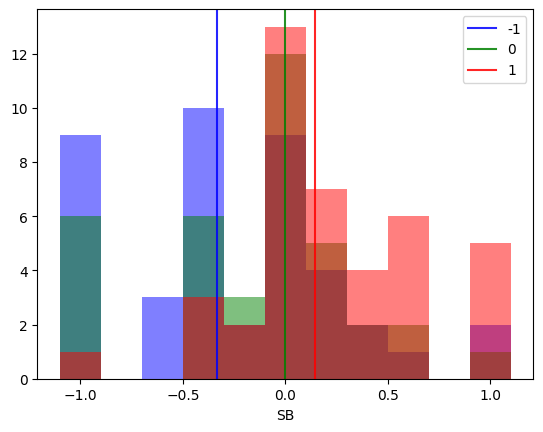

In [10]:
color = {-1: 'b', 0: 'g', 1: 'r'}
for label in [-1, 0, 1]:

    sb_label = all_data[all_data['SB_labeled'] == label]['SB'].to_list()
    plt.hist(sb_label, color = color[label], alpha = 0.50, bins = np.arange(-1.10, 1.11, 0.20))
    plt.axvline(np.median(sb_label), label = label, color = color[label], alpha = 0.85) 

plt.xlabel('SB')
plt.legend()
plt.show()

### Model 

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None, fit_intercept=False)

x = all_data['SB'].to_numpy().reshape(-1,1)
y = all_data['SB_labeled'].to_numpy()

logreg.fit(x, y)

logreg.classes_

array([-1.,  0.,  1.])

In [50]:
logreg.coef_

array([[-0.88504735],
       [-0.37316579],
       [ 1.25821314]])

In [51]:
xrange = np.arange(-1, 1.01, 0.025)
estimated_probas = logreg.predict_proba([[i] for i in xrange])

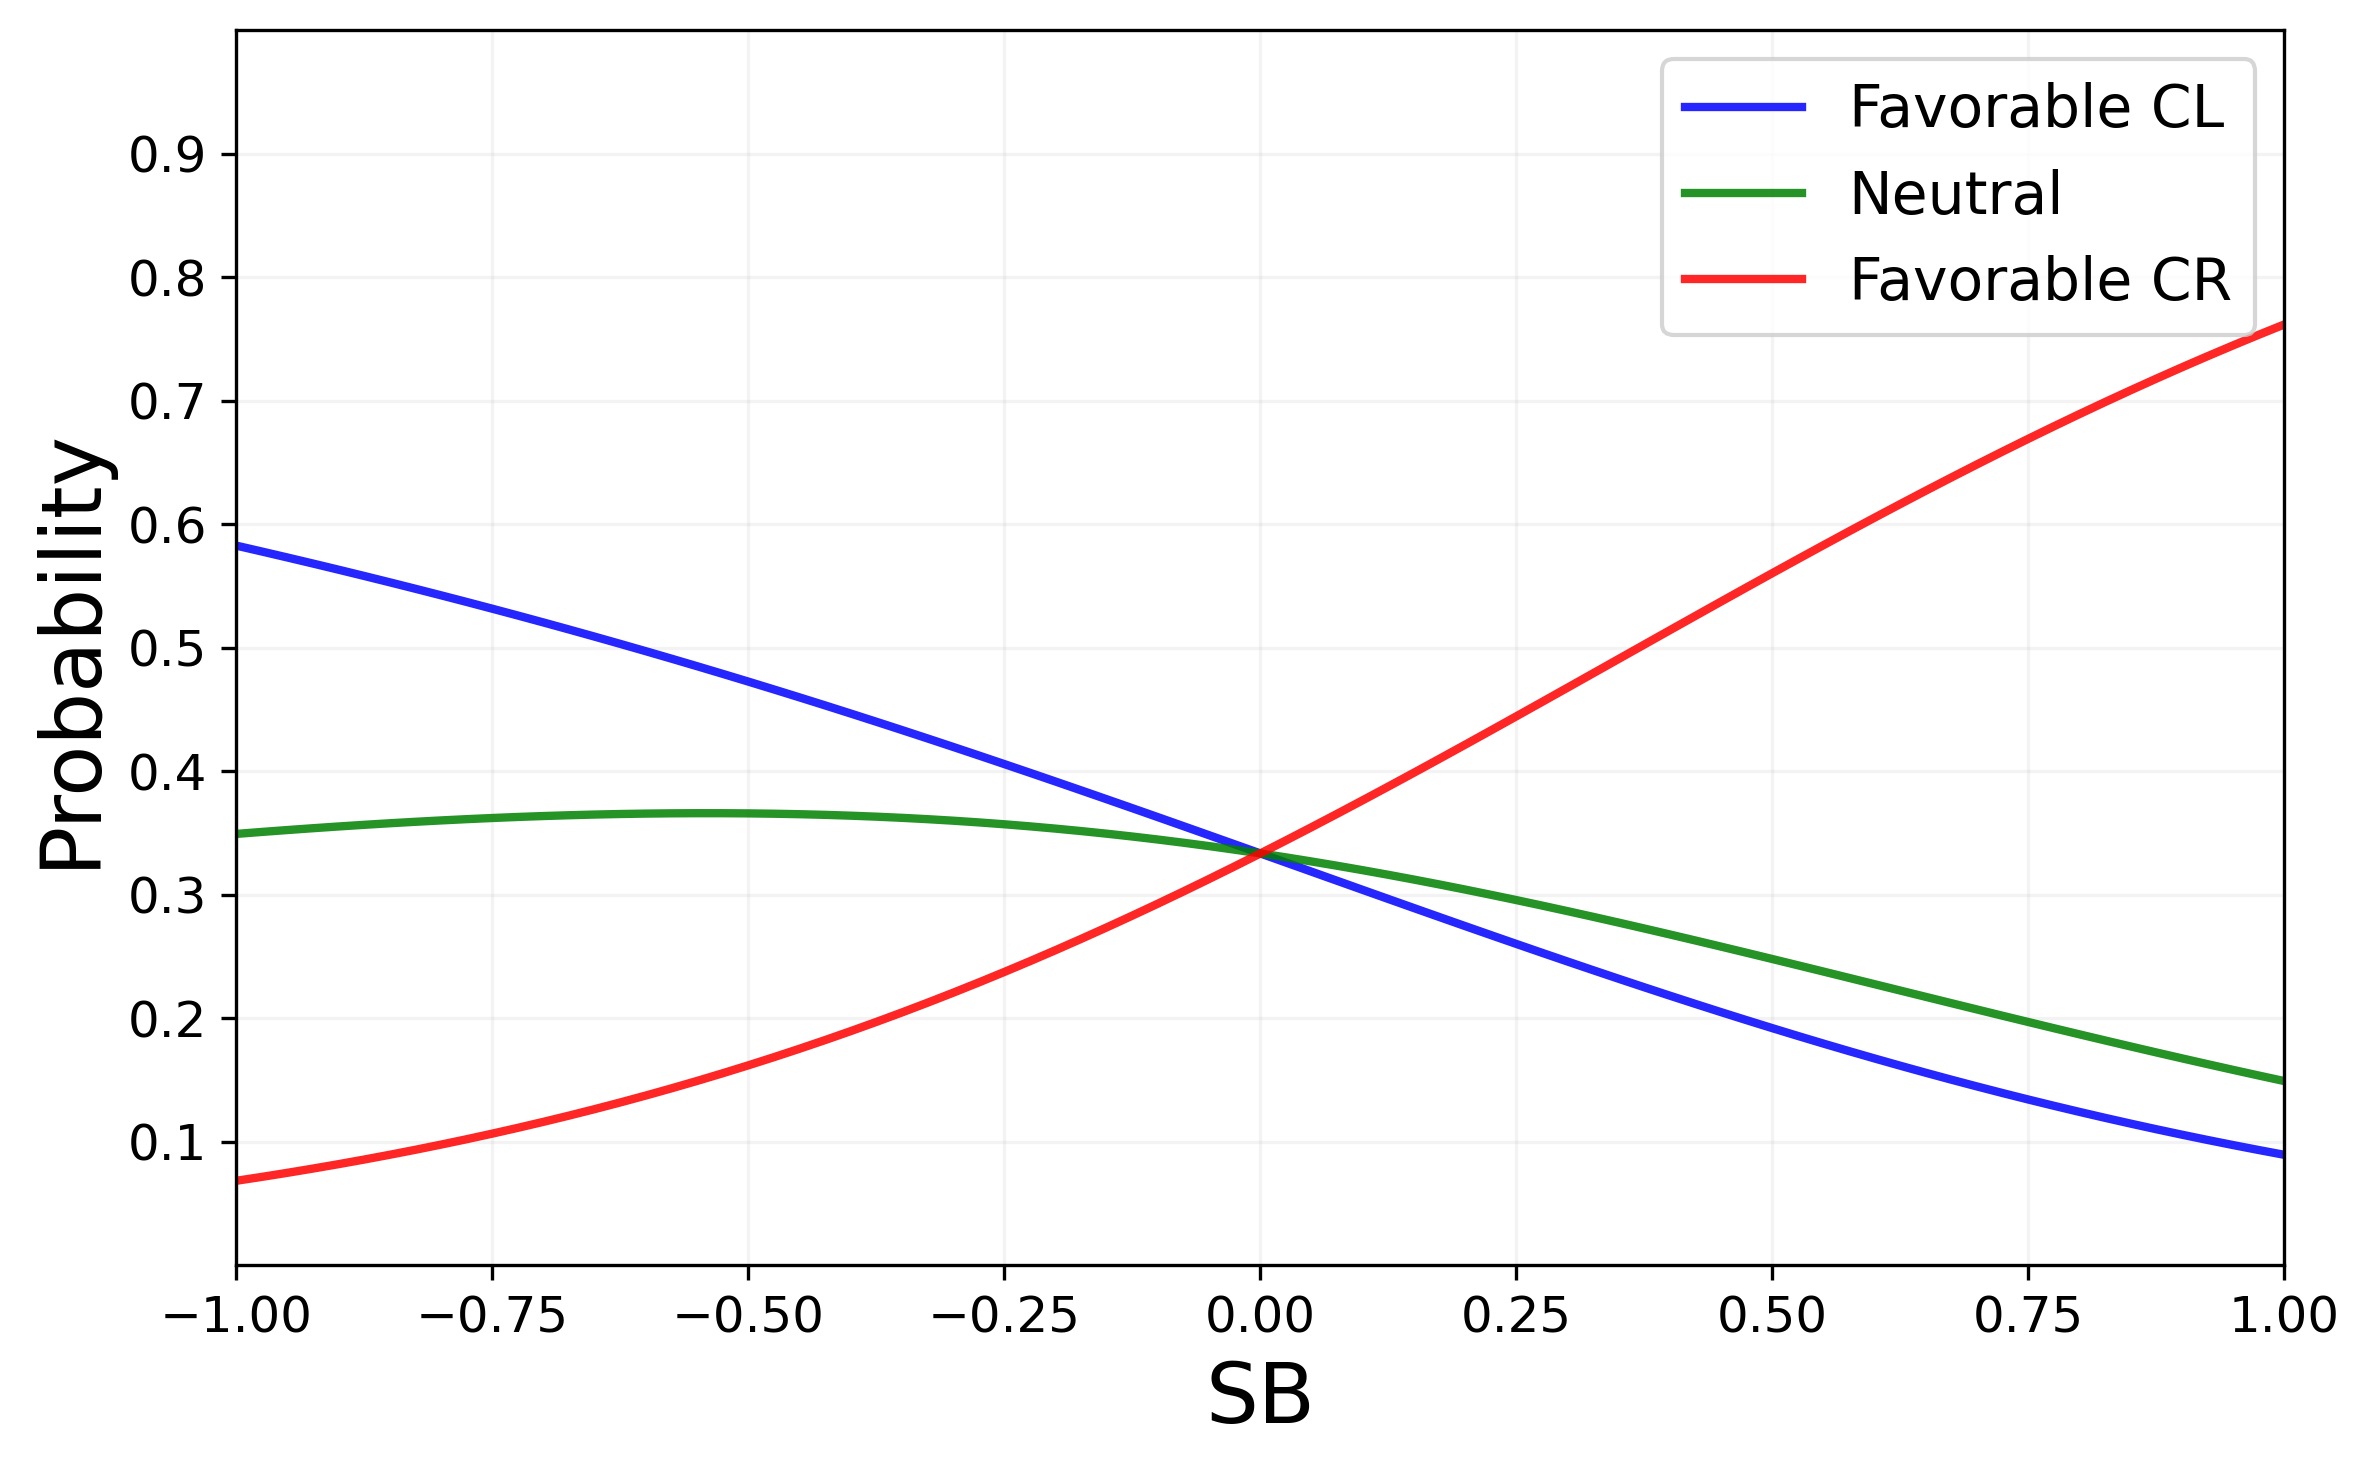

In [52]:
plt.figure(figsize = (8,5), dpi = 300)
plt.plot(xrange, estimated_probas[:,0], linewidth = 2, alpha = 0.85, color = 'b', label = 'Favorable CL')
plt.plot(xrange, estimated_probas[:,1], linewidth = 2, alpha = 0.85, color = 'g', label = 'Neutral')
plt.plot(xrange, estimated_probas[:,2], linewidth = 2, alpha = 0.85, color = 'r', label = 'Favorable CR')

plt.grid(True, alpha = 0.15)
plt.legend(loc= 'best', fontsize = 14)
plt.xlabel('SB', size = 20)
plt.ylabel('Probability', size = 20)
plt.yticks(np.arange(0.10, 0.91, 0.10), ['{:1.1}'.format(i) for i in np.arange(0.10, 0.91, 0.10)], size = 12)
plt.xticks(size = 12)
plt.ylim([0,1])
plt.xlim([-1, 1])
plt.tight_layout()
plt.savefig('SB_validation.pdf')
plt.show()

# Error of the model

In [53]:
def probas_bootstrap(data):

    logreg = LogisticRegression(penalty=None, fit_intercept=False)

    probas = []
    coeffs = []
    for iteration in range(1000):
        
        sample = data.sample(n = all_data.shape[0], replace = True)
        
        x = sample['SB'].to_numpy().reshape(-1,1)
        y = sample['SB_labeled'].to_numpy()
        
        logreg.fit(x, y)
        
        xrange = np.arange(-1, 1.01, 0.025)
        
        probas.append(logreg.predict_proba([[i] for i in xrange]))
        coeffs.append(logreg.coef_.ravel())
        
    return np.array(probas), np.array(coeffs)

In [54]:
probas, coeffs = probas_bootstrap(all_data)

In [55]:
quantiles = np.quantile(probas, axis = 0, q = [0.05, 0.95])

In [56]:
sb_neg_qi = quantiles[0].T[0]
sb_neg_qs = quantiles[1].T[0]

sb_neu_qi = quantiles[0].T[1]
sb_neu_qs = quantiles[1].T[1]

sb_pos_qi = quantiles[0].T[2]
sb_pos_qs = quantiles[1].T[2]

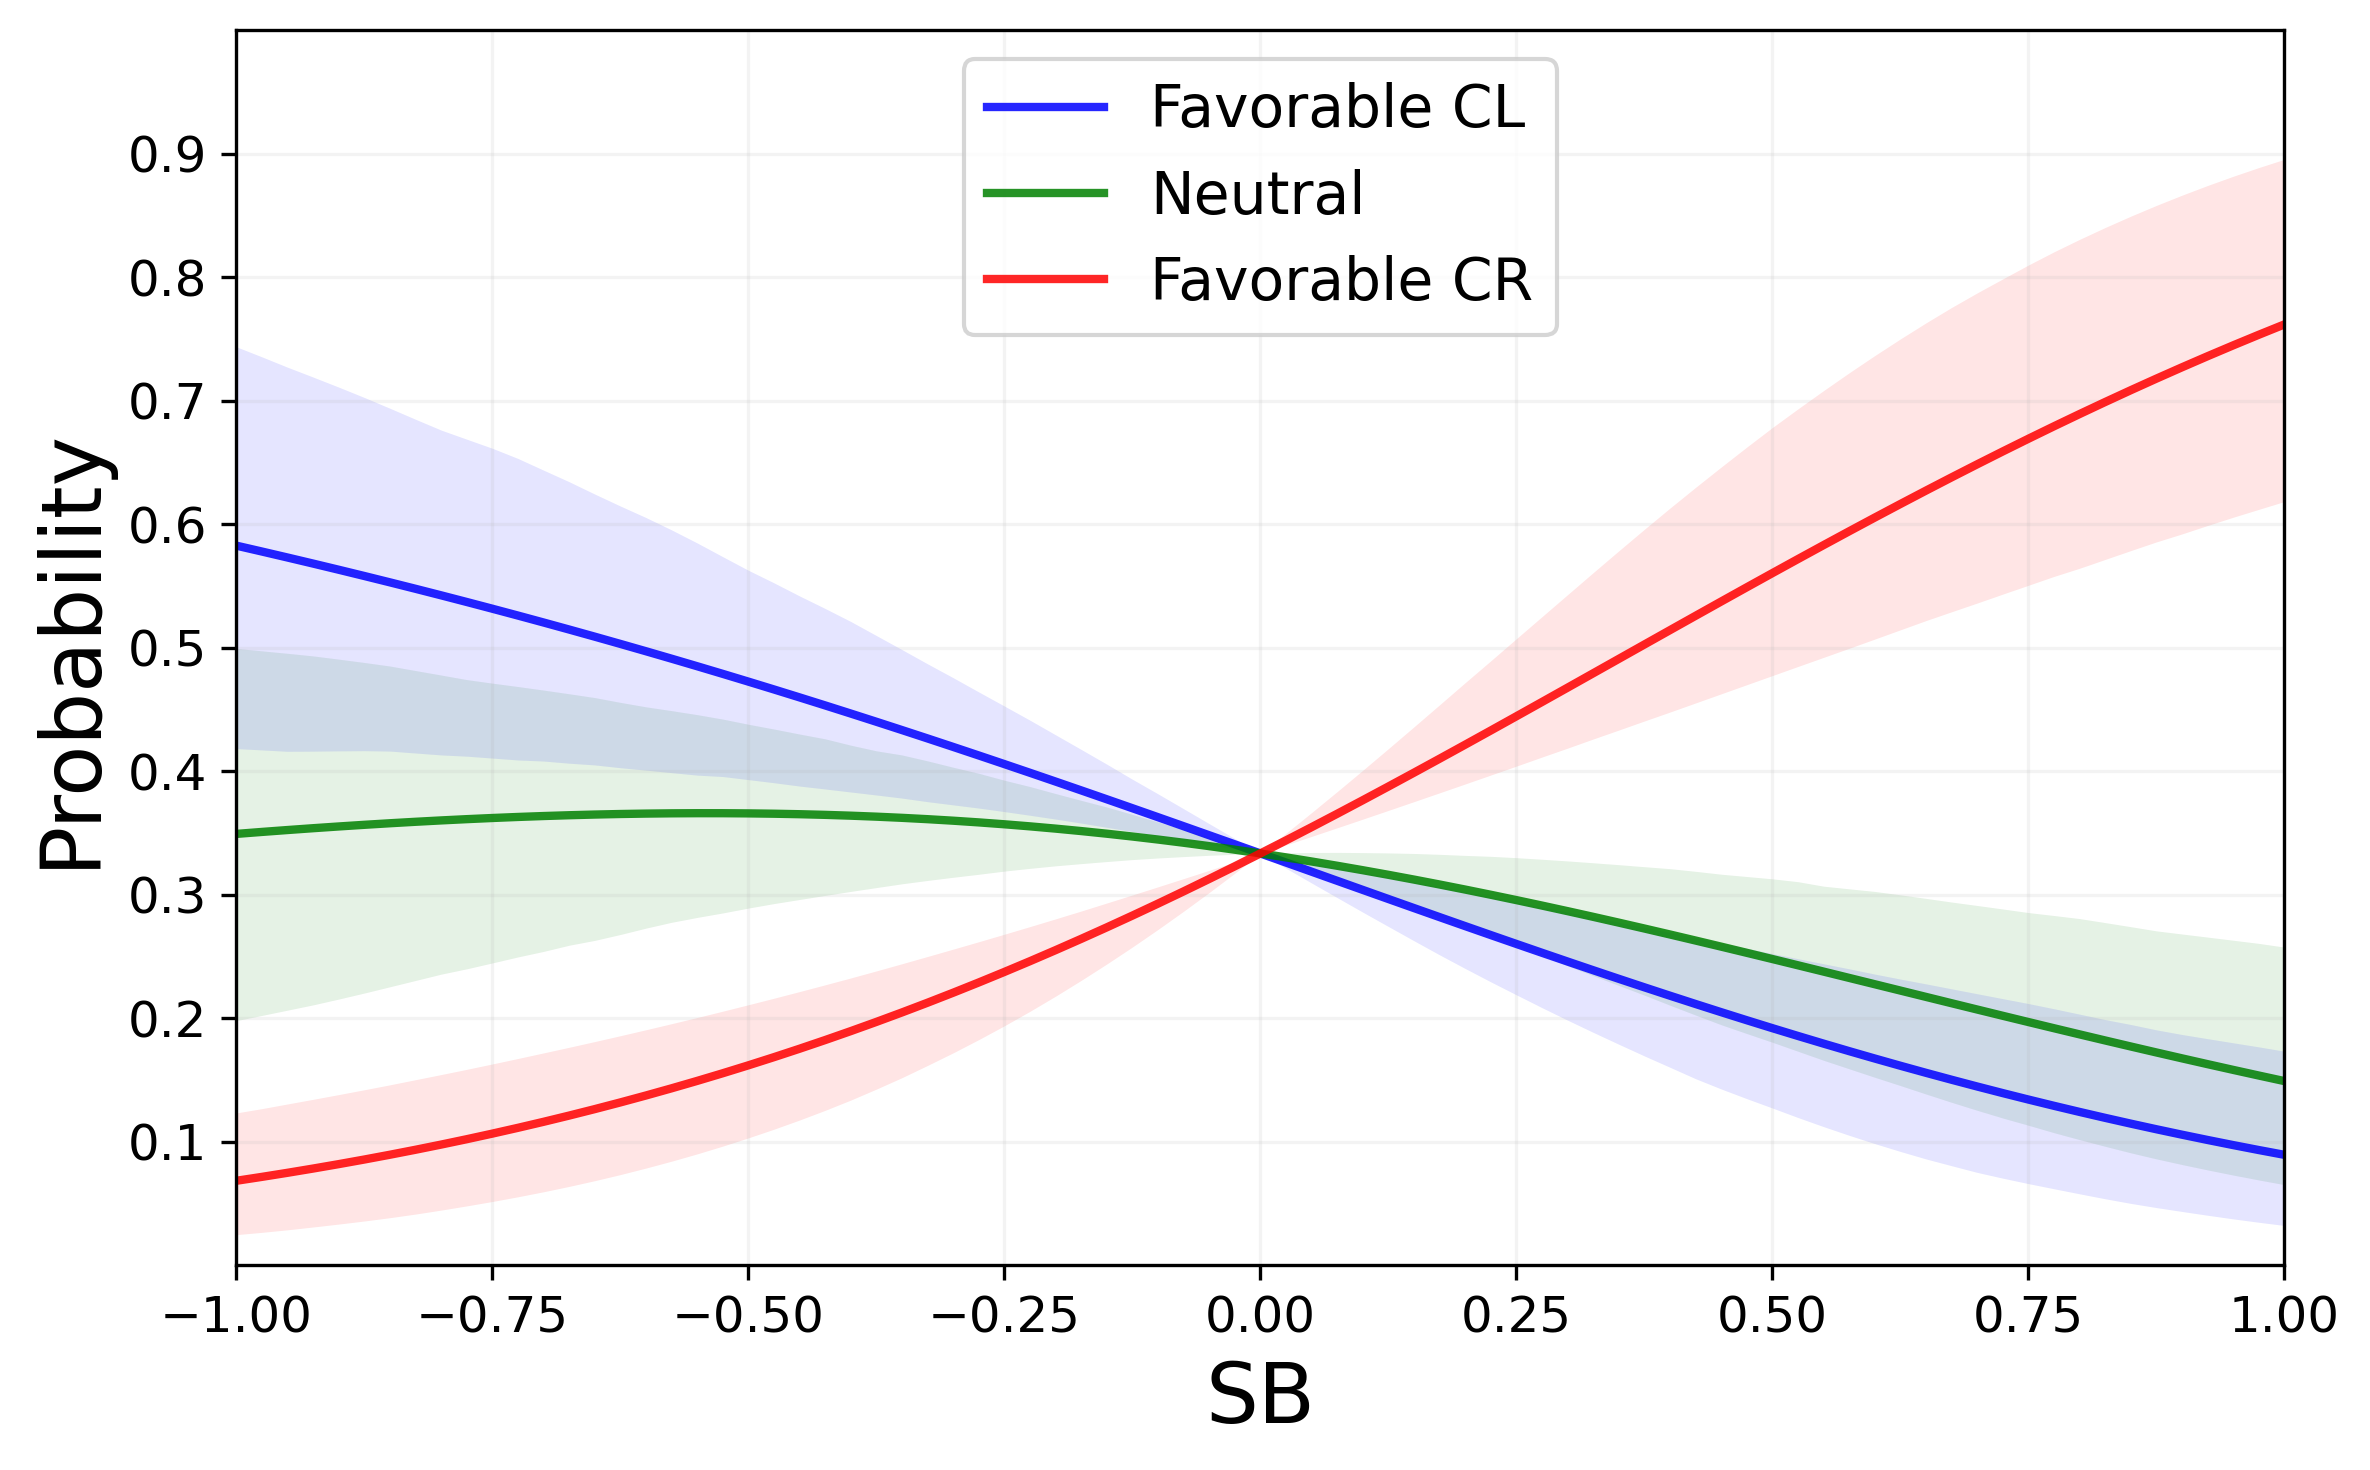

In [57]:
plt.figure(figsize = (8,5), dpi = 300)
plt.plot(xrange, estimated_probas[:,0], linewidth = 2, alpha = 0.85, color = 'b', label = 'Favorable CL')
plt.plot(xrange, estimated_probas[:,1], linewidth = 2, alpha = 0.85, color = 'g', label = 'Neutral')
plt.plot(xrange, estimated_probas[:,2], linewidth = 2, alpha = 0.85, color = 'r', label = 'Favorable CR')

plt.fill_between(xrange, y1=sb_neu_qi, y2=sb_neu_qs, alpha = 0.10, color = 'g', linewidth = 0)
plt.fill_between(xrange, y1=sb_pos_qi, y2=sb_pos_qs, alpha = 0.10, color = 'r', linewidth = 0)
plt.fill_between(xrange, y1=sb_neg_qi, y2=sb_neg_qs, alpha = 0.10, color = 'b', linewidth = 0)

plt.grid(True, alpha = 0.15)
plt.legend(loc= 'upper center', fontsize = 14)
plt.xlabel('SB', size = 20)
plt.ylabel('Probability', size = 20)
plt.yticks(np.arange(0.10, 0.91, 0.10), ['{:1.1}'.format(i) for i in np.arange(0.10, 0.91, 0.10)], size = 12)
plt.xticks(size = 12)
plt.ylim([0,1])
plt.xlim([-1, 1])
plt.tight_layout()
plt.savefig('SB_validation_with_errors.pdf')
plt.show()

In [58]:
np.quantile(coeffs, q = [0.05, 0.95], axis = 0)

array([[-1.44392423, -0.8155236 ,  0.82214169],
       [-0.44142469,  0.07081479,  1.94396395]])

### Relation between infered SB and labeled

In [258]:
# Spearman correlation
from scipy.stats import spearmanr

spearmanr(all_data['SB'], all_data['SB_labeled'])

SignificanceResult(statistic=0.3528671210084856, pvalue=7.719683774867909e-05)

In [259]:
from sklearn.metrics import mean_squared_error

print('MSE predicted = ', mean_squared_error(all_data['SB_labeled'], all_data['SB'])**0.5)

# Null model 
null_errors = []
aux = all_data['SB_labeled'].to_numpy().copy()
for iteration in range(1000):
    np.random.shuffle(aux)
    null_errors.append(mean_squared_error(aux, all_data['SB'])**0.5)
print('Quantiles null model = ', np.quantile(null_errors, q = [0.025, 0.975]))

MSE predicted =  0.7777584399144081
Quantiles null model =  [0.86533426 1.01517289]


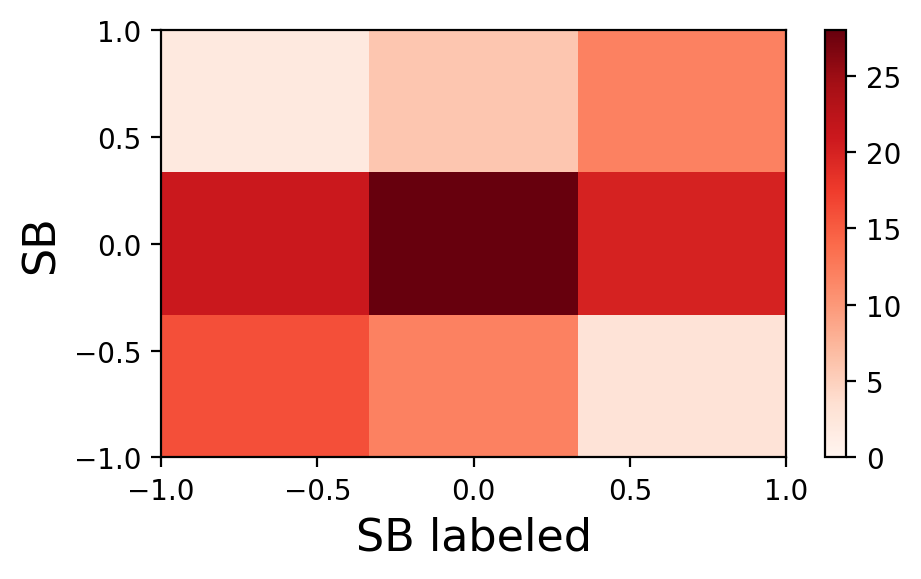

In [260]:
plt.figure(dpi = 200, figsize = (5,3))
plt.hist2d(all_data['SB_labeled'], all_data['SB'], 
           bins = 3, range = [(-1, 1), (-1, 1)], vmin = 0,
           cmap = 'Reds')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('SB labeled', size = 16)
plt.ylabel('SB', size = 16)
plt.colorbar()
plt.tight_layout()
plt.show()

Coincidence with sign:

In [261]:
all_data['SB'].quantile(q = [0, 1./3, 2./3, 1.00])

0.000000   -1.000000
0.333333   -0.228571
0.666667    0.121693
1.000000    1.000000
Name: SB, dtype: float64

In [279]:
def SB_sign(x, pop):
    qs = np.quantile(pop, q = [0, 1./3, 2./3, 1])
    if x < qs[1]:
        return -1
    elif x >= qs[1] and x < qs[2]:
        return 0
    else:
        return 1

all_data['SB_sign'] = all_data['SB'].apply(lambda x: SB_sign(x, all_data['SB']))

In [280]:
all_data['SB_labeled_sign'] = np.sign(all_data['SB_labeled'])

In [281]:
from sklearn.metrics import confusion_matrix

In [282]:
cm = confusion_matrix(all_data['SB_labeled_sign'], all_data['SB_sign'])

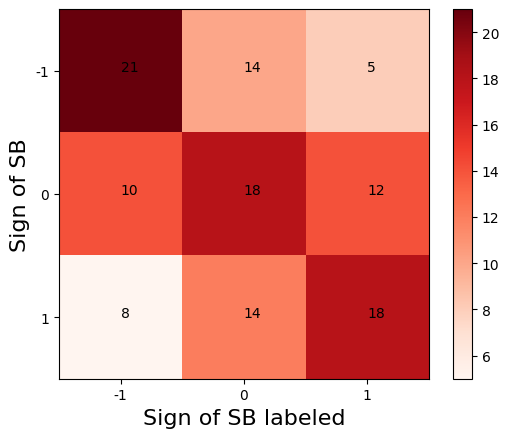

In [283]:
plt.imshow(cm, cmap='Reds')
plt.colorbar()
plt.xticks([0, 1, 2], [-1, 0, 1])
plt.yticks([0, 1, 2], [-1, 0, 1])
plt.xlabel('Sign of SB labeled', size = 16)
plt.ylabel('Sign of SB', size = 16)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i,j,cm[i,j])
plt.show()

In [287]:
np.sum(np.diag(cm)) / np.sum(cm)

0.475

Controversial cases:

In [268]:
all_data[(all_data['SB_sign'] < 0) & (all_data['SB_labeled_sign'] > 0)][['id', 'url', 'SB', 'SB_labeled', 'SCL_labeled', 'SCR_labeled']]

,id,url,SB,SB_labeled,SCL_labeled,SCR_labeled
31,-3352887454006048493,https://www.lanacion.com.ar/opinion/el-mito-de...,-1.000000,1.0,-1.0,0.0
47,6202666966386505602,https://www.infobae.com/politica/2019/07/12/ma...,-0.333333,1.0,0.0,1.0
49,-3879227906405420709,https://tn.com.ar/opinion/alberto-fernandez-ap...,-0.400000,1.0,-1.0,0.0
63,9195529169829762687,https://www.cronista.com/economia-politica/Mac...,-0.333333,1.0,0.0,1.0
87,8226954940476533438,https://www.clarin.com/politica/primer-candida...,-1.000000,1.0,0.0,1.0


In [269]:
all_data[(all_data['SB_sign'] > 0) & (all_data['SB_labeled_sign'] < 0)][['id', 'url', 'SB', 'SB_labeled', 'SCL_labeled', 'SCR_labeled']]

,id,url,SB,SB_labeled,SCL_labeled,SCR_labeled
11,8037672664675302836,https://www.cronista.com/economiapolitica/Cris...,0.166667,-1.0,0.0,-1.0
12,-2062053610324306684,https://www.eldestapeweb.com/nota/el-mensaje-d...,0.500000,-1.0,1.0,0.0
24,-1693969572505588111,https://www.eldestapeweb.com/nota/alberto-fern...,0.333333,-1.0,1.0,0.0
30,2422477898870905862,https://www.eldestapeweb.com/nota/elecciones-2...,0.333333,-1.0,1.0,0.0
92,596793561751662667,https://www.infobae.com/america/the-new-york-t...,0.173913,-1.0,1.0,0.0
94,-1763451196222822625,https://www.perfil.com/noticias/politica/la-hi...,0.285714,-1.0,1.0,0.0
115,1727367450422062412,https://www.clarin.com/politica/jose-pepe-muji...,0.250000,-1.0,1.0,-1.0
116,3854876077660909861,https://www.eldestapeweb.com/nota/elecciones-2...,0.666667,-1.0,1.0,0.0


### Relation between users

In [270]:
users_classification_cr = pd.DataFrame()
users_classification_cl = pd.DataFrame()

users_classification_cr['url'] = all_data['url']
users_classification_cr['id'] = all_data['id']
users_classification_cr['SCR_labeled'] = all_data['SCR_labeled']

users_classification_cr['Seba'] = data1['Posicion CR']
users_classification_cr['Pablo'] = data2['Posicion CR']
users_classification_cr['Sofi'] = data3['Posicion CR']

users_classification_cl['url'] = all_data['url']
users_classification_cl['id'] = all_data['id']
users_classification_cl['SCL_labeled'] = all_data['SCL_labeled']


users_classification_cl['Seba'] = data1['Posicion CL']
users_classification_cl['Pablo'] = data2['Posicion CL']
users_classification_cl['Sofi'] = data3['Posicion CL']

In [271]:
users_classification_cr[['Seba', 'Pablo', 'Sofi']].corr(method='spearman')

,Seba,Pablo,Sofi
Seba,1.000000,0.646836,0.730507
Pablo,0.646836,1.000000,0.621171
Sofi,0.730507,0.621171,1.000000


In [272]:
users_classification_cl[['Seba', 'Pablo', 'Sofi']].corr(method='spearman')

,Seba,Pablo,Sofi
Seba,1.000000,0.585982,0.630273
Pablo,0.585982,1.000000,0.465965
Sofi,0.630273,0.465965,1.000000


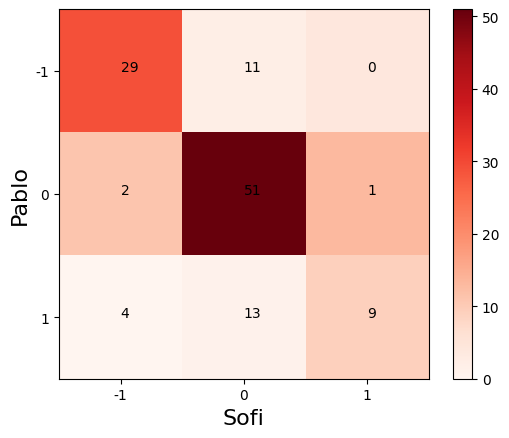

In [275]:
user1, user2 = ['Sofi', 'Pablo']
data2inspect = users_classification_cr

cm = confusion_matrix(data2inspect[user1], data2inspect[user2])

plt.imshow(cm, cmap='Reds')
plt.colorbar()
plt.xticks([0, 1, 2], [-1, 0, 1])
plt.yticks([0, 1, 2], [-1, 0, 1])
plt.xlabel(user1, size = 16)
plt.ylabel(user2, size = 16)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i,j,cm[i,j])
plt.show()

In [277]:
data2inspect[(data2inspect[user1] == -1) & (data2inspect[user2] == 1)]

,url,id,SCR_labeled,Seba,Pablo,Sofi
18,https://www.cronista.com/columnistas/Dolar-pla...,293381187404244382,0.0,0,1,-1
36,https://www.eldia.com/nota/2019-8-14-10-8-0-pl...,-4912312221420731777,0.0,0,1,-1
38,https://www.laizquierdadiario.com/Nuevo-aval-d...,6143532770720159767,-1.0,-1,1,-1
69,https://www.pagina12.com.ar/184443-la-libertad...,-1583429867124542729,-1.0,-1,1,-1
